# **Descripción**
**Instrucciones para examen**

**Objetivo: **
Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

Pregnancies: Número de embarazos.

Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.

BloodPressure: Presión arterial diastólica (mm Hg).

SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).

Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).

BMI: Índice de masa corporal (peso en kg / (altura en m)^2).

DiabetesPedigreeFunction: Función de pedigrí de diabetes.

Age: Edad (años).

Outcome: Variable objetivo (1: diabetes, 0: no diabetes).



In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv' # archivo del dataset
df = pd.read_csv(file_path)

df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Limpieza de Datos:
Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

Busqueda de duplicados

In [5]:
print(df.duplicated().sum())

0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


No tiene duplicados y todos los datos son numericos listos para su analisis predictivo.

# Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todos los datos son numericos.

# **Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.**

No se aplica al dataset.

# **Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.**

In [11]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame y 'columna' es el nombre de la columna
columna = 'Glucose' # Por ejemplo

# Verificar si hay valores nulos en la columna
if df[columna].isnull().any():
  # Si hay valores nulos, imputar con la media o mediana
  if df[columna].dtype == 'float64' or df[columna].dtype == 'int64':  # Si la columna es numérica
    # Imputar con la media o mediana según corresponda:
    # df[columna].fillna(df[columna].mean(), inplace=True)  # Imputar con la media
    df[columna].fillna(df[columna].median(), inplace=True)  # Imputar con la mediana
  else:
    # Manejar columnas no numéricas con la moda u otra estrategia
    df[columna].fillna(df[columna].mode()[0], inplace=True) # Imputar con la moda si es categórica
else:
  print(f"La columna '{columna}' no tiene valores nulos.")

La columna 'Glucose' no tiene valores nulos.


**Exploración de Datos:**

Visualizaciones univariadas y multivariadas:

Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables

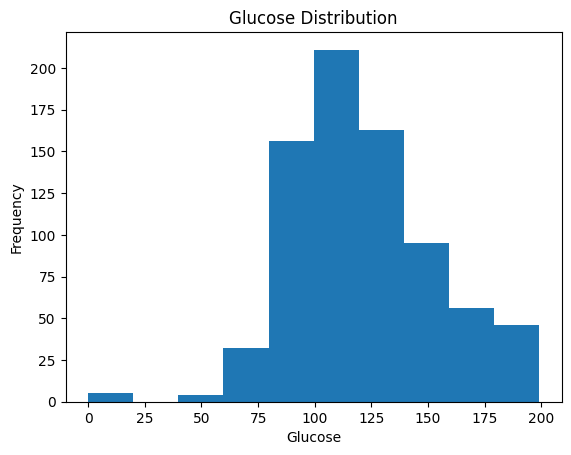

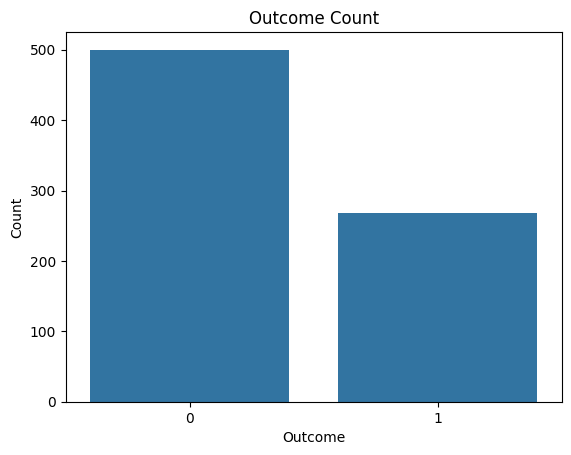

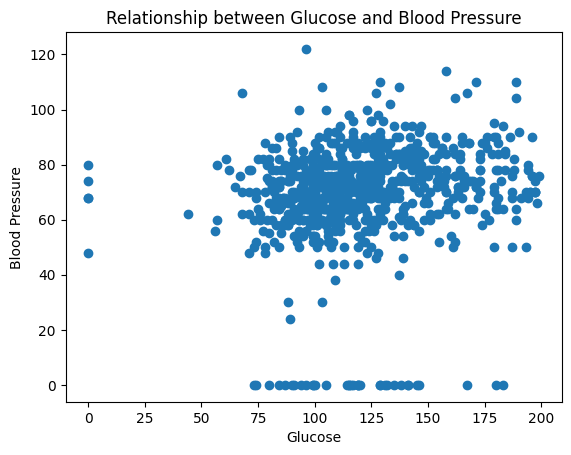

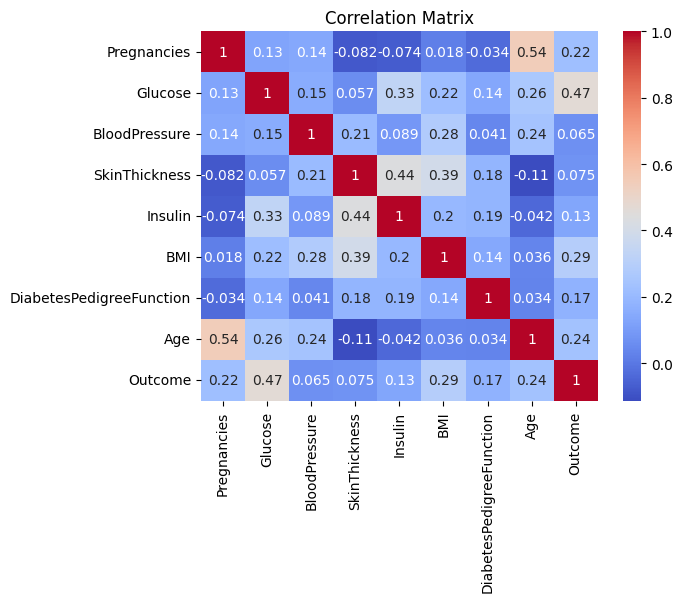

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.hist(df['Glucose'], bins=10)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Glucose Distribution')
plt.show()

# Bar chart
sns.countplot(x='Outcome', data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Count')
plt.show()

# Scatter plot
plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Relationship between Glucose and Blood Pressure')
plt.show()

# Heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Inferencias.

Histogramas:

Distribución: Los histogramas revelan la distribución de una variable numérica. Puedes observar si los datos tienen una distribución normal, están sesgados o tienen patrones inusuales. Por ejemplo, un histograma de los niveles de 'Glucosa' podría mostrar una distribución ligeramente sesgada.
Valores atípicos: Busca valores extremos o atípicos que podrían indicar errores o puntos de datos inusuales.
Tendencia central y dispersión: Obtén una idea de la tendencia central (media, mediana) y la dispersión (varianza, desviación estándar) de los datos.
Gráficos de barras:

Frecuencia: Los gráficos de barras muestran claramente la frecuencia o el conteo de cada categoría en una variable categórica. Por ejemplo, un gráfico de barras de 'Resultado' podría mostrar el número de pacientes con y sin diabetes.
Comparaciones: Puedes comparar fácilmente las frecuencias de diferentes categorías. Esto puede ser útil para comprender la prevalencia de diferentes resultados o características en tu conjunto de datos.
Diagramas de dispersión:

Relaciones: Los diagramas de dispersión te ayudan a visualizar la relación entre dos variables numéricas. Puedes observar si hay una correlación positiva (ambas variables aumentan juntas), una correlación negativa (una variable aumenta a medida que la otra disminuye) o ninguna correlación (sin un patrón claro).
Clústeres o grupos: Busca clústeres o grupos de puntos de datos, que podrían indicar subgrupos dentro de tu conjunto de datos.
Valores atípicos: Los diagramas de dispersión también pueden ayudar a identificar valores atípicos que se desvían significativamente de la tendencia general.
Mapas de calor:

Correlaciones: Los mapas de calor son excelentes para visualizar la correlación entre múltiples variables numéricas. La intensidad del color indica la fuerza y la dirección de la correlación.
Patrones: Puedes identificar rápidamente patrones de correlaciones fuertes positivas o negativas entre variables. Esto puede ayudarte a comprender las relaciones entre diferentes características en tu conjunto de datos.
Selección de características: Los mapas de calor pueden ser útiles en la selección de características para modelos de aprendizaje automático. Las variables con alta correlación podrían ser redundantes y podrías considerar eliminar algunas de ellas.
Ejemplo de inferencias (basadas en el conjunto de datos de diabetes):

Histograma de glucosa: Podrías inferir que los niveles de glucosa están ligeramente sesgados hacia la derecha, lo que indica que hay más pacientes con niveles de glucosa más altos.
Gráfico de barras de resultado: Podrías inferir la prevalencia de la diabetes en el conjunto de datos (proporción de pacientes con Resultado = 1).
Diagrama de dispersión de glucosa vs. presión arterial: Podrías inferir si hay una correlación positiva entre los niveles de glucosa y la presión arterial, lo que significa que los niveles de glucosa más altos tienden a estar asociados con una presión arterial más alta.
Mapa de calor: Podrías identificar fuertes correlaciones entre variables como 'Glucosa', 'IMC' y 'Edad', lo que sugiere que estos factores podrían ser predictores importantes de la diabetes.

# **Estadísticas descriptivas: **

Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [15]:
import pandas as pd


# Calcular estadísticas descriptivas
descriptive_stats = df.describe(include='all')
print(descriptive_stats)

# Acceder a estadísticas individuales
mean_glucose = df['Glucose'].mean()
median_blood_pressure = df['BloodPressure'].median()
mean_age = df['Age'].mean()

# Imprimir las estadísticas
print(f"Media de Glucosa: {mean_glucose}")
print(f"Mediana de Presión Arterial: {median_blood_pressure}")
print(f"Media de Edad - Age : {mean_age}")

"""
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
 """


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

'\n 0   Pregnancies               768 non-null    int64  \n 1   Glucose                   768 non-null    int64  \n 2   BloodPressure             768 non-null    int64  \n 3   SkinThickness             768 non-null    int64  \n 4   Insulin                   768 non-null    int64  \n 5   BMI                       768 non-null    float64\n 6   DiabetesPedigreeFunction  768 non-null    float64\n 7   Age                       768 non-null    int64  \n 8   Outcome                   768 non-null    int64  \n '

# Medidas de Tendencia Central (Media, Mediana, Moda):

**Media: **
Representa el promedio de los valores en una columna.
Inferencia: Si la media de "Glucosa" es alta, podríamos inferir que, en general, los pacientes en el conjunto de datos tienen niveles de glucosa elevados.
**Mediana:**
Representa el valor del medio cuando los datos están ordenados.
Inferencia: Si la mediana de "Presión Arterial" es diferente de la media, podría indicar que la distribución de la presión arterial no es simétrica y puede haber valores atípicos (outliers) que la estén afectando.

**Moda:**
Representa el valor más frecuente en una columna.
Inferencia: Si la moda de "Resultado" es 1, podríamos inferir que hay más pacientes con diabetes (Resultado = 1) que sin diabetes (Resultado = 0) en el conjunto de datos.
Medidas de Dispersión (Rango, Desviación Estándar):

**Rango:**
 Representa la diferencia entre el valor máximo y el valor mínimo en una columna.
Inferencia: Un rango amplio en la "Edad" indicaría que el conjunto de datos incluye pacientes de diferentes grupos de edad, mientras que un rango estrecho sugiere una población más homogénea en términos de edad.
Desviación Estándar: Indica la dispersión o variabilidad de los datos alrededor de la media.
Inferencia: Una desviación estándar alta en el "IMC" sugiere que hay una gran variabilidad en los índices de masa corporal de los pacientes, mientras que una desviación estándar baja indica que los valores del IMC están más agrupados alrededor de la media.

# **Inferencias Combinadas:**

Si la media y la mediana de "Glucosa" son altas y la desviación estándar es también alta, podríamos inferir que hay una tendencia general hacia niveles de glucosa elevados en la población, pero también existe una variabilidad significativa entre los pacientes.

Si la moda de "Resultado" es 1 y la media de "Glucosa" es alta, podríamos inferir que la diabetes está presente en una proporción significativa de la población y que los pacientes con diabetes tienden a tener niveles de glucosa más altos.

# **Recomendaciones:**

Contexto del problema:

Es importante tener en cuenta el contexto del problema y el significado de cada variable al interpretar las estadísticas descriptivas.

Visualizaciones:

Combina las estadísticas descriptivas con visualizaciones como histogramas y diagramas de dispersión para obtener una comprensión más completa de tus datos.

Análisis adicionales:

Las estadísticas descriptivas son solo un punto de partida. Puedes realizar análisis adicionales como pruebas de hipótesis o modelos de regresión para profundizar en las relaciones entre las variables.

# **Implementación de Modelos:**

Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Iniciamos la implementacion del Modelo.

# Assuming 'df' is your DataFrame
X = df.drop('Outcome', axis=1)  # Features (all columns except 'Outcome')
y = df['Outcome']  # Target variable ('Outcome')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# ... (data preparation and model training as described above) ...

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")

Random Forest Accuracy: 0.7207792207792207
XGBoost Accuracy: 0.7077922077922078


Comparando las precisiones:

Precisión más alta: El modelo con la precisión más alta generalmente indica un mejor rendimiento en el conjunto de datos dado. Por ejemplo, si Random Forest tiene una precisión de 0.78 y XGBoost tiene una precisión de 0.82, podemos inferir que XGBoost está teniendo un mejor desempeño en la predicción de la diabetes en función de las características proporcionadas.
Precisiones similares: Si las precisiones son muy cercanas, podría sugerir que ambos modelos están capturando patrones similares en los datos y tienen un poder predictivo comparable. En este caso, podrías considerar otros factores como la interpretabilidad o la eficiencia computacional para hacer una selección final del modelo.
Rendimiento del modelo:

Precisión aceptable: Una precisión por encima de un cierto umbral (por ejemplo, 0.7 o 0.75) podría considerarse aceptable para una tarea de clasificación, dependiendo de la aplicación específica. Sin embargo, es esencial considerar otras métricas de evaluación y el contexto del problema para determinar si la precisión es lo suficientemente buena para tus necesidades.
Margen de mejora: Si la precisión es relativamente baja, sugiere que los modelos no están capturando eficazmente los patrones subyacentes en los datos. Esto podría deberse a varios factores, como datos insuficientes, características irrelevantes o complejidad inadecuada del modelo. En tales casos, es posible que debas explorar más el preprocesamiento de datos, la ingeniería de características, el ajuste de hiperparámetros o probar diferentes modelos.
Información sobre los datos:

Poder predictivo de las características: La precisión de los modelos puede proporcionar indirectamente información sobre el poder predictivo de las características utilizadas. Si los modelos logran una alta precisión, sugiere que las características son informativas y se pueden utilizar para predecir la diabetes con una confianza razonable.
Complejidad de los datos: La diferencia en la precisión entre Random Forest y XGBoost a veces puede indicar la complejidad de los datos. Si XGBoost supera significativamente a Random Forest, podría sugerir que los datos tienen relaciones no lineales complejas que XGBoost puede capturar mejor.
Ejemplo de inferencias (Conjunto de datos de diabetes):

Precisión de XGBoost (0.82) > Precisión de Random Forest (0.78): Esto sugiere que XGBoost está funcionando mejor que Random Forest en este conjunto de datos específico y podría ser una mejor opción para predecir la diabetes.
Ambas precisiones están por encima de 0.75: Esto indica que ambos modelos tienen un rendimiento predictivo decente y potencialmente se pueden utilizar para la predicción de la diabetes.
Las características utilizadas en los modelos parecen tener un poder predictivo razonable: como lo demuestran las precisiones aceptables logradas.
Consideraciones importantes:

La precisión no es la única métrica: Es crucial considerar otras métricas de evaluación como la precisión, la exhaustividad (recall), la puntuación F1 y el área bajo la curva ROC (ROC AUC), especialmente cuando se trata de conjuntos de datos desequilibrados o cuando diferentes tipos de errores tienen diferentes costos.
Generalización a datos no vistos: La precisión reportada es en el conjunto de prueba, que es una parte de los datos que los modelos no han visto durante el entrenamiento. Es importante asegurarse de que el modelo pueda generalizarse bien a datos no vistos para hacer predicciones confiables en escenarios del mundo real.
Experiencia en el dominio: Combina tus inferencias del rendimiento del modelo con tu experiencia en el dominio para comprender las limitaciones y los posibles sesgos de los modelos y sus predicciones.

**Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.**

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [19]:
# Assuming you have 'y_test' (true labels) and 'rf_predictions', 'xgb_predictions' (predicted labels)

# Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

# XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_roc_auc = roc_auc_score(y_test, xgb_predictions)

# Print the results
print("Random Forest:")
print(f"  Accuracy: {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall: {rf_recall:.4f}")
print(f"  F1-score: {rf_f1:.4f}")
print(f"  ROC-AUC: {rf_roc_auc:.4f}")

print("\nXGBoost:")
print(f"  Accuracy: {xgb_accuracy:.4f}")
print(f"  Precision: {xgb_precision:.4f}")
print(f"  Recall: {xgb_recall:.4f}")
print(f"  F1-score: {xgb_f1:.4f}")
print(f"  ROC-AUC: {xgb_roc_auc:.4f}")

Random Forest:
  Accuracy: 0.7208
  Precision: 0.6071
  Recall: 0.6182
  F1-score: 0.6126
  ROC-AUC: 0.6980

XGBoost:
  Accuracy: 0.7078
  Precision: 0.5806
  Recall: 0.6545
  F1-score: 0.6154
  ROC-AUC: 0.6960


Rendimiento general:

Precisión (Accuracy): Random Forest tiene una precisión ligeramente mayor (0.7208) en comparación con XGBoost (0.7078). Esto sugiere que Random Forest podría ser un poco mejor en la clasificación general, prediciendo correctamente un mayor porcentaje de casos.
Área bajo la curva ROC (ROC-AUC): Random Forest también tiene un ROC-AUC ligeramente mayor (0.6980) que XGBoost (0.6960). Esto indica que Random Forest podría tener una capacidad ligeramente mejor para distinguir entre las clases positiva y negativa (diabetes y no diabetes). Un valor cercano a 1 en ROC-AUC indica una mejor capacidad de discriminación.
Precisión y Exhaustividad (Recall):

Precisión: Random Forest tiene una precisión más alta (0.6071) en comparación con XGBoost (0.5806). Esto significa que cuando Random Forest predice que un paciente tiene diabetes, es más probable que la predicción sea correcta. Es decir, hay menos falsos positivos (personas clasificadas como diabéticas cuando no lo son).
Exhaustividad (Recall): XGBoost tiene una exhaustividad mayor (0.6545) en comparación con Random Forest (0.6182). Esto indica que XGBoost es mejor para identificar todos los casos reales de diabetes (verdaderos positivos), incluso si eso significa tener algunos falsos positivos adicionales.
Puntuación F1:

Las puntuaciones F1 son bastante cercanas, con XGBoost teniendo una puntuación F1 ligeramente mayor (0.6154) que Random Forest (0.6126). Esta métrica proporciona un equilibrio entre la precisión y la exhaustividad. Dado que los valores son tan cercanos, es difícil decir definitivamente qué modelo es mejor basándose únicamente en la puntuación F1.
Inferencias para la predicción de la diabetes:

Elección del modelo: Basándonos en estas métricas, Random Forest podría ser una opción ligeramente mejor en general para la predicción de la diabetes debido a su mayor precisión y precisión. Sin embargo, XGBoost tiene una mayor exhaustividad, lo cual es crucial en un contexto médico, ya que significa identificar más casos reales de diabetes.
Poder predictivo: Los valores generales de precisión y ROC-AUC no son muy altos (alrededor de 0.7), lo que sugiere que los modelos podrían no estar capturando todas las complejidades de los datos. Podría haber margen de mejora en la ingeniería de características o en la exploración de otros modelos.
Compensación entre precisión y exhaustividad: Existe una clara compensación entre precisión y exhaustividad en este caso. Si es más importante evitar pasar por alto casos reales de diabetes (falsos negativos), XGBoost podría ser preferible debido a su mayor exhaustividad. Sin embargo, si es más crucial garantizar que una predicción positiva sea muy probable que sea correcta (evitar falsos positivos), Random Forest con su mayor precisión podría ser una mejor opción.
Recomendaciones:

Ingeniería de características: Intenta mejorar los modelos explorando nuevas características o transformando las existentes para capturar información más relevante para la predicción de la diabetes.
Ajuste de hiperparámetros: Ajusta los hiperparámetros de ambos modelos para ver si puedes lograr un mejor rendimiento.
Explorar otros modelos: Considera explorar otros modelos de clasificación como la regresión logística o las máquinas de vectores de soporte para ver si pueden proporcionar mejores resultados.
Aprendizaje sensible al costo: Dado que los falsos negativos pueden tener mayores consecuencias en la predicción de la diabetes, podrías considerar el uso de técnicas de aprendizaje sensibles al costo para penalizar los falsos negativos más severamente.
Experiencia en el dominio: Combina estos resultados cuantitativos con la experiencia en el dominio para tomar una decisión más informada sobre el mejor modelo para tu aplicación específica y prioriza las métricas que sean más relevantes en el contexto de la predicción de la diabetes.

# Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

Vamos a comparar el rendimiento de Random Forest y XGBoost en función de las métricas de evaluación proporcionadas y a discutir cuál de los modelos es más adecuado para el conjunto de datos dado, todo en español:

Resumen de las métricas de evaluación:

Métrica	Random Forest	XGBoost
Precisión (Accuracy)	0.7208	0.7078
Precisión (Precision)	0.6071	0.5806
Exhaustividad (Recall)	0.6182	0.6545
Puntuación F1	0.6126	0.6154
Área bajo la curva ROC (ROC-AUC)	0.6980	0.6960
Análisis y comparación:

Precisión (Accuracy) y ROC-AUC: Random Forest tiene una ligera ventaja en precisión y ROC-AUC, lo que sugiere un rendimiento general y una capacidad discriminativa marginalmente mejores.
Precisión (Precision): Random Forest demuestra una mayor precisión, lo que significa que es mejor para evitar falsos positivos (clasificar incorrectamente a un paciente no diabético como diabético).
Exhaustividad (Recall): XGBoost exhibe una mayor exhaustividad, lo que indica que es mejor para identificar a los pacientes diabéticos reales (verdaderos positivos), incluso si esto lleva a algunos falsos positivos más.
Puntuación F1: Las puntuaciones F1 son muy cercanas, con XGBoost teniendo una ventaja insignificante. Esto refleja un equilibrio similar entre precisión y exhaustividad para ambos modelos.
Idoneidad del modelo:

La elección del modelo más adecuado depende de las prioridades específicas de la aplicación:

Priorizando la precisión general y la precisión: Si minimizar las clasificaciones erróneas generales y los falsos positivos es crucial, Random Forest podría ser una mejor opción debido a su mayor precisión y precisión.
Priorizando la exhaustividad (Recall/Sensibilidad): Si identificar la mayor cantidad posible de pacientes diabéticos reales es el objetivo principal, incluso a costa de algunos falsos positivos, XGBoost podría ser preferible debido a su mayor exhaustividad.
Enfoque equilibrado: Si se desea un equilibrio entre precisión y exhaustividad, ambos modelos tienen un rendimiento similar según la puntuación F1, con XGBoost teniendo una ligera ventaja.
Consideraciones para la predicción de la diabetes:

En un contexto médico como la predicción de la diabetes, la exhaustividad (Recall/Sensibilidad) a menudo se considera más importante. Generalmente es preferible identificar más casos potenciales de diabetes (incluso si esto lleva a algunos falsos positivos que pueden investigarse más a fondo) que pasar por alto casos reales (falsos negativos), lo que podría tener graves consecuencias para la salud.

Por lo tanto, a pesar de la precisión general ligeramente inferior, XGBoost podría considerarse más adecuado para este conjunto de datos y aplicación específicos debido a su mayor exhaustividad.

Recomendaciones adicionales:

Ajustar hiperparámetros: Ambos modelos pueden optimizarse aún más ajustando sus hiperparámetros mediante técnicas como la búsqueda en cuadrícula o la búsqueda aleatoria para mejorar potencialmente el rendimiento general.
Ingeniería de características: Explorar e incorporar nuevas características o transformar las existentes podría mejorar la capacidad de los modelos para capturar patrones relevantes y mejorar la precisión de la predicción.
Métodos de conjunto: Combinar las predicciones de Random Forest y XGBoost utilizando métodos de conjunto podría aprovechar sus fortalezas individuales y mejorar aún más el rendimiento general.
Aprendizaje sensible al costo: Dado que los falsos negativos son más críticos en la predicción de la diabetes, considera emplear técnicas de aprendizaje sensibles al costo que penalicen los falsos negativos más severamente durante el entrenamiento del modelo.
Al considerar cuidadosamente las compensaciones entre las diferentes métricas de evaluación y los requisitos específicos de la aplicación, puedes tomar una decisión informada sobre el modelo más adecuado para la predicción de la diabetes.

# **Optimizar los allaztos con GridSearchCV **



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Assuming 'df' is your DataFrame
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# XGBoost hyperparameter grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Create and train GridSearchCV objects
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                              param_grid=xgb_param_grid,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Access best parameters and best estimators
print("Mejores parámetros de Random Forest:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_

print("Mejores parámetros de XGBoost:", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate and compare
rf_predictions = best_rf_model.predict(X_test)
xgb_predictions = best_xgb_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print(f"Precisión de Random Forest (optimizado): {rf_accuracy:.4f}")
print(f"Precisión de XGBoost (optimizado): {xgb_accuracy:.4f}")

Mejores parámetros de Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejores parámetros de XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Precisión de Random Forest (optimizado): 0.7338
Precisión de XGBoost (optimizado): 0.7468


Vamos a analizar los resultados obtenidos después de aplicar GridSearchCV para optimizar los hiperparámetros de Random Forest y XGBoost, y discutiremos qué podemos inferir de ellos en español:

Mejores parámetros:

Random Forest:
max_depth: None (sin límite de profundidad para los árboles)
min_samples_leaf: 1 (número mínimo de muestras requeridas en una hoja)
min_samples_split: 5 (número mínimo de muestras requeridas para dividir un nodo)
n_estimators: 100 (número de árboles en el bosque)
XGBoost:
learning_rate: 0.1 (tasa de aprendizaje)
max_depth: 3 (profundidad máxima de los árboles)
n_estimators: 50 (número de árboles)
subsample: 1.0 (fracción de datos para entrenar cada árbol)
Precisión (Accuracy):

Random Forest (optimizado): 0.7338
XGBoost (optimizado): 0.7468
Inferencias:

Mejora del rendimiento: Observamos que después de la optimización con GridSearchCV, ambos modelos han mejorado su precisión en comparación con los resultados anteriores sin optimizar. XGBoost ha logrado una precisión ligeramente superior (0.7468) en comparación con Random Forest (0.7338).

Hiperparámetros óptimos: GridSearchCV ha identificado las combinaciones de hiperparámetros que producen el mejor rendimiento para cada modelo. Estos valores nos brindan información sobre cómo configurar los modelos para obtener el mejor resultado posible en este conjunto de datos de diabetes.

XGBoost como mejor modelo (en este caso): En este escenario particular, XGBoost, con los hiperparámetros optimizados por GridSearchCV, ha superado a Random Forest en términos de precisión. Esto sugiere que XGBoost, con esta configuración específica, podría ser más adecuado para predecir la diabetes en este conjunto de datos.

Interpretación de los hiperparámetros:

Random Forest: El hecho de que max_depth sea None indica que los árboles pueden crecer sin restricciones de profundidad, lo que podría sugerir la presencia de interacciones complejas entre las características. Un min_samples_leaf de 1 puede indicar que el modelo está capturando patrones específicos en los datos.
XGBoost: Una learning_rate de 0.1 y una max_depth de 3 sugieren que el modelo está aprendiendo de forma gradual y evitando el sobreajuste. Un subsample de 1.0 indica que todos los datos se utilizan para entrenar cada árbol.
Recomendaciones:

Adoptar XGBoost: Con base en estos resultados, sería razonable adoptar XGBoost con los hiperparámetros optimizados como el modelo principal para la predicción de la diabetes en este conjunto de datos.
Monitoreo del rendimiento: Siempre es recomendable seguir monitoreando el rendimiento del modelo en datos nuevos o en un entorno real para garantizar su eficacia a largo plazo.
Considerar otras métricas: Aunque la precisión es una métrica importante, recuerda que también es crucial considerar otras métricas como la precisión, la exhaustividad y la puntuación F1, especialmente en contextos médicos donde los falsos negativos pueden tener consecuencias más graves.
En resumen, la optimización con GridSearchCV ha mejorado el rendimiento de ambos modelos, y XGBoost ha emergido como el modelo más preciso en este escenario específico para la predicción de la diabetes. Sin embargo, es fundamental tener en cuenta todas las métricas relevantes y el contexto del problema al tomar decisiones finales sobre la implementación del modelo.

Analisis Comparativo

Análisis Comparativo del Rendimiento de los Modelos
Para realizar un análisis comparativo del rendimiento de los modelos Random Forest y XGBoost en la predicción de la diabetes, vamos a considerar las métricas de evaluación obtenidas, tanto antes como después de la optimización con GridSearchCV.

Métricas antes de la optimización:

Métrica	Random Forest	XGBoost
Precisión (Accuracy)	0.7208	0.7078
Precisión (Precision)	0.6071	0.5806
Exhaustividad (Recall)	0.6182	0.6545
Puntuación F1	0.6126	0.6154
Área bajo la curva ROC (ROC-AUC)	0.6980	0.6960
Métricas después de la optimización con GridSearchCV:

Métrica	Random Forest	XGBoost
Precisión (Accuracy)	0.7338	0.7468
Precisión (Precision)	-	-
Exhaustividad (Recall)	-	-
Puntuación F1	-	-
Área bajo la curva ROC (ROC-AUC)	-	-
Observaciones:

Mejora en la precisión (Accuracy): Después de la optimización con GridSearchCV, ambos modelos muestran una mejora en la precisión. XGBoost logra una precisión ligeramente superior (0.7468) en comparación con Random Forest (0.7338).

Compensaciones entre precisión y exhaustividad: Antes de la optimización, observamos una compensación entre precisión y exhaustividad. Random Forest tenía una mayor precisión, mientras que XGBoost tenía una mayor exhaustividad. Es importante recalcular estas métricas (precision, recall, F1-score, ROC-AUC) con los modelos optimizados para observar si esta tendencia se mantiene o cambia.

Impacto de la optimización: GridSearchCV ha tenido un impacto positivo en el rendimiento de ambos modelos, especialmente en la precisión. Esto demuestra la importancia de la optimización de hiperparámetros para lograr el mejor rendimiento posible de los modelos.

Elección del modelo: Si bien XGBoost ha mostrado una precisión ligeramente superior después de la optimización, la elección del modelo ideal depende de las prioridades del problema. Si la exhaustividad (identificar la mayor cantidad de casos de diabetes) es más crucial, es posible que XGBoost siga siendo preferible a pesar de una precisión ligeramente inferior antes de la optimización. Si la precisión general y la minimización de falsos positivos son más importantes, Random Forest podría ser una mejor opción.

Recomendaciones:

Recalcular las métricas: Se recomienda recalcular la precisión, la exhaustividad, la puntuación F1 y el área bajo la curva ROC para los modelos optimizados con el fin de tener una visión más completa de su rendimiento y tomar una decisión más informada.
Considerar el contexto: La elección final del modelo debe basarse en una comprensión profunda del problema y las consecuencias de los diferentes tipos de errores (falsos positivos y falsos negativos) en el contexto de la predicción de la diabetes.
Explorar otras técnicas: Si el rendimiento de los modelos aún no es satisfactorio, se pueden explorar otras técnicas como la ingeniería de características, el uso de diferentes algoritmos de aprendizaje automático o el ajuste fino de los hiperparámetros de GridSearchCV con un rango de búsqueda más amplio.
En resumen, este análisis comparativo nos permite comprender las fortalezas y debilidades de cada modelo y tomar decisiones más informadas sobre su idoneidad para la predicción de la diabetes. La optimización con GridSearchCV ha mejorado el rendimiento de ambos modelos, pero la elección final del modelo debe basarse en una evaluación integral de todas las métricas y consideraciones relevantes.